# PHREEQC Model Plotting
This notebook will plot your PHREEQC results along with your data. You will need to upload the analyzed adsorption data and the selected output file from PHREEQC. 


### Start this notebook by uploading your analyzed adsorption data and selected output file from PHREEQC.

In [24]:
# import the pandas module to store data in a dataframe
import pandas as pd

df1 = pd.read_csv("df_zn_only.csv")
# load the selected output into a dataframe and specify that the data are separated by tabs
# the filename needs to match exactly the file uploaded in the previous cell
mod = pd.read_csv("selected_output_1.sel", sep="\t")
# get rid of the first row data (see comment above about why)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

# Double check that the selected output looks correct

In [25]:
mod

,pH,m_BactaOZn+,m_BactbOZn+,m_BactcOZn+,Unnamed: 4
2,3.0,1.458000e-06,2.561100e-08,6.621400e-08,NaN
3,3.5,2.602600e-06,7.625900e-08,2.037400e-07,NaN
4,4.0,3.426200e-06,2.118200e-07,6.235900e-07,NaN
5,4.5,3.698700e-06,4.944200e-07,1.878800e-06,NaN
6,5.0,3.508700e-06,8.255700e-07,5.331900e-06,NaN
7,5.5,2.859500e-06,9.016300e-07,1.301300e-05,NaN
8,6.0,1.881400e-06,6.659400e-07,2.415800e-05,NaN
9,6.5,1.077000e-06,3.966200e-07,3.338400e-05,NaN
10,7.0,6.709600e-07,2.502700e-07,3.799500e-05,NaN
11,7.5,5.154800e-07,1.930700e-07,3.961700e-05,NaN


# Double check that the data looks correct

In [26]:
df1

,sample_name,pH,sampabs,tot_zn_ppm,sampconc,Znads,Znadsper
0,Z1,4.862,0.1356,3.0,2.181449,0.818551,27.285027
1,Z2,6.248,0.0525,NaN,0.907573,2.092427,69.747575
2,Z4,5.552,0.0202,NaN,0.412432,2.587568,86.252271
3,Z5,8.930,0.0761,NaN,1.269348,1.730652,57.688416
4,Z6,7.960,0.0585,NaN,0.999549,2.000451,66.681687
5,Z7,5.088,0.1362,NaN,2.190647,0.809353,26.978439
6,Z8,6.066,0.0525,NaN,0.907573,2.092427,69.747575
7,Z9,7.550,0.0639,NaN,1.082328,1.917672,63.922388
8,A10,5.472,0.1195,NaN,1.962823,1.037177,34.572569
9,A11,5.877,0.1163,NaN,1.913950,1.086050,36.201670


### We need to sum Zn adsorbed onto each surface site at each pH value in order to calculate total Zn adsorbed.

In [27]:
# Convert the total Zn used in the experiments from ppm to molality
znm = df1["tot_zn_ppm"][0] / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads = mod["m_BactaOZn+"] + mod["m_BactbOZn+"] + mod["m_BactcOZn+"]
# calculate total zn adsorbed as a percent
modsper = (modznads / znm) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOZn+"] / znm * 100
siteb = mod["m_BactbOZn+"] / znm * 100
sitec = mod["m_BactcOZn+"] / znm * 100


### Now we can plot the experimental data and model result on the same plot. We can also add the predicted speciation of the Zn surface species.

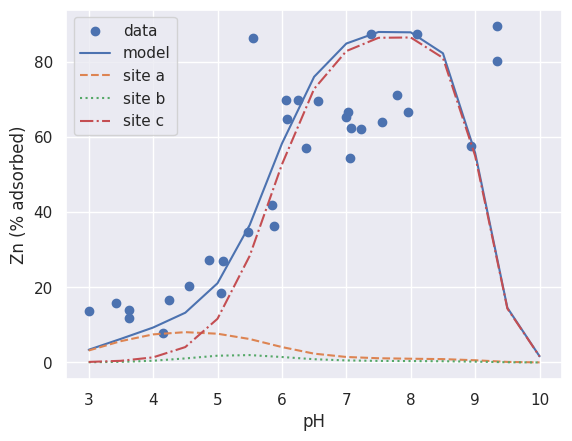

In [28]:
# I'll need to import a some modules for the plotting and downloading the plot.
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set()

plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df1["pH"], df1["Znadsper"], label="data")
plt.plot(mod["pH"], modsper, label="model")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod.pdf")